In [1]:
import sys
import pickle
import photoshop.api as ps
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import pandas as pd
import shutil
import torch
from IPython.display import clear_output
import umap
from random import randint

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\anaconda3\envs\ms_thesis_Env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\anaconda3\envs\ms_thesis_Env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075

In [17]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [66]:
np.array([os.path.join("C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw", x) for x in data["name"]])

array(['C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0001_Layer 3.jpg',
       'C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0002_Layer 4.jpg',
       'C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0003_Layer 5.jpg',
       'C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0004_Layer 6.jpg',
       'C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0005_Layer 7.jpg',
       'C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0006_Layer 8.jpg',
       'C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0007_Layer 9.jpg',
       'C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw\\2aae034ae1396720aa35cd47e91ef17a_0008_Layer 

In [68]:
data["name"].shape[0]

127

In [ ]:
import os

import torch
from torch_geometric.data import Dataset, download_url


class MyOwnDataset(Dataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None, data_dict = {}):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data_dict = data_dict

    @property
    def raw_file_names(self):
        return np.array([os.path.join("C://Austin//Projects//MS_Thesis_Data//base_gnn_testing_root//raw", x) for x in self.data_dict["name"]])

    @property
    def processed_file_names(self):
        return "not_implemented.pt"

    def download(self):
        pass

    def process(self):
        idx = 0
        for raw_path in self.raw_paths:
            # Read data from `raw_path`.
            data = Data(...)

            if self.pre_filter is not None and not self.pre_filter(data):
                continue

            if self.pre_transform is not None:
                data = self.pre_transform(data)

            torch.save(data, os.path.join(self.processed_dir, f'data_{idx}.pt'))
            idx += 1

    def len(self):
        return self.data_dict["name"].shape[0]

    def get(self, idx):
        data = torch.load(os.path.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
path = "C:\Austin\Projects\MS_Thesis_Data\General\Eyes\Raw_Lineart\extracted_jpgs"

In [13]:
eye_images = []
file_names = []
for img in os.listdir(path):
  file_names.append(img)
  img_arr=cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
  img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
  img_arr = cv2.resize(img_arr, (224,224))
  eye_images.append(np.array(img_arr))
    

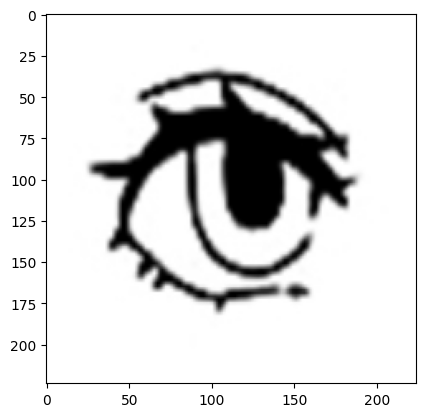

In [14]:
plt.imshow(eye_images[0])
plt.show()

In [15]:
eye_images = np.array(eye_images)
file_names = np.array(file_names)

In [16]:
print(eye_images.shape)
print(file_names.shape)


(127, 224, 224, 3)
(127,)


In [17]:
data = {"name":file_names, "image":eye_images, "features":[]}

In [18]:
data["image"][0].shape

(224, 224, 3)

In [19]:
for i in range(len(data["name"])):
    img = data["image"][i]
    img = img.reshape(1,224,224,3)
    img = preprocess_input(img)
    features = model.predict(img)
    data["features"].append(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

fc63a7727c6fd9e36f964f7dcea3d04_0017_Layer 19.jpg
(224, 224, 3)
(1, 4096)


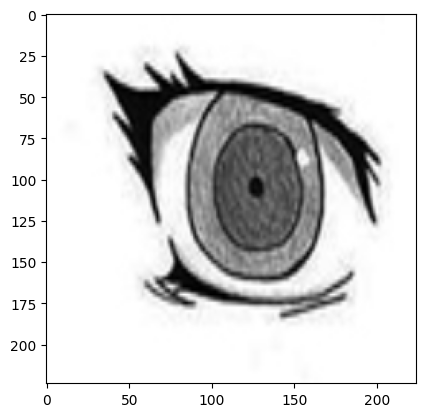

In [20]:
n = 123
print(data["name"][n])
plt.imshow(data["image"][n])
print(data["image"][n].shape)
print(data["features"][n].shape)
plt.show()

In [21]:
features = []
names = []
for i in range(len(data["features"])):
  features.append(data["features"][i])
  names.append(data["name"][i])

features = np.array(features)

In [22]:
features.shape

(127, 1, 4096)

In [3]:
features = features.reshape(-1,4096)
features.shape

NameError: name 'features' is not defined

In [24]:
pca = PCA(n_components=100, random_state=22)
pca.fit(features)
x = pca.transform(features)
data["factor"]=x

In [149]:
data["factor"].shape

(127, 100)

In [107]:
x = np.array(data["image"].reshape([127,150528]))

In [4]:
data["features"] = np.array(data["features"]).reshape((127,4096))
x = data["features"]

In [159]:
x = data["factor"]

In [5]:
kmeans = KMeans(n_clusters=5, random_state=69)
kmeans.fit(x)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,69
,copy_x,True
,algorithm,'lloyd'


In [6]:
kmeans.cluster_centers_.shape

(5, 4096)

In [7]:
data["cluster"]=kmeans.labels_

In [8]:
unique, counts = np.unique(data["cluster"], return_counts=True)
counts

array([30, 31, 21, 34, 11])

In [9]:
print(data["cluster"].shape)
print(data["factor"].shape)

(127,)
(127, 100)


In [10]:
n=-1

0
2aae034ae1396720aa35cd47e91ef17a_0001_Layer 3.jpg
2
(224, 224, 3)
(4096,)
(100,)


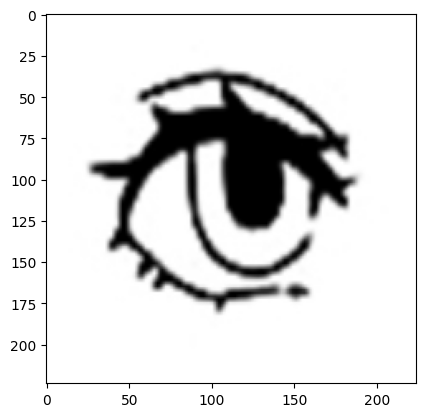

In [11]:
n=n+1
print(n)
print(data["name"][n])
print(data["cluster"][n])
print(data["image"][n].shape)
print(data["features"][n].shape)
print(data["factor"][n].shape)
plt.imshow(data["image"][n])
plt.show()

In [60]:
with open('C://Austin//Projects//MS_Thesis_Data//test_eye_clusters_extract.pk1', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('C://Austin//Projects//MS_Thesis_Data//test_eye_clusters_extract.pk1', 'rb') as handle:
    data = pickle.load(handle)

In [169]:
temp_path = "C://Austin//Projects//MS_Thesis_Data//temp"

for i in range(len(data["cluster"])):
    clust_path = os.path.join(temp_path, str(data["cluster"][i]))
    if not os.path.exists(clust_path):
        os.mkdir(clust_path)
    else:
        im = Image.fromarray(data["image"][i])
        im.save(os.path.join(clust_path, data["name"][i]))
    


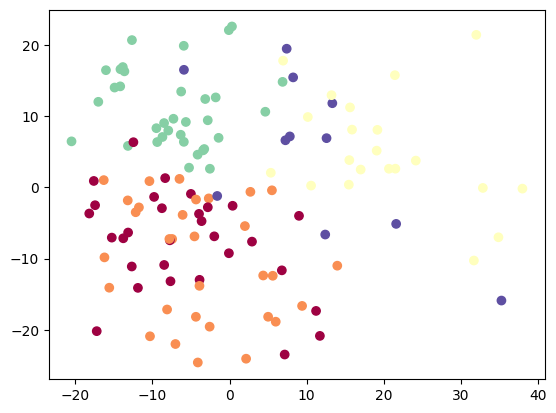

In [14]:
i = 0
x = [k[i] for k in data["factor"]]
y = [k[i+1] for k in data["factor"]]

plt.scatter(x,y,c=data["cluster"], cmap="Spectral")
plt.show()

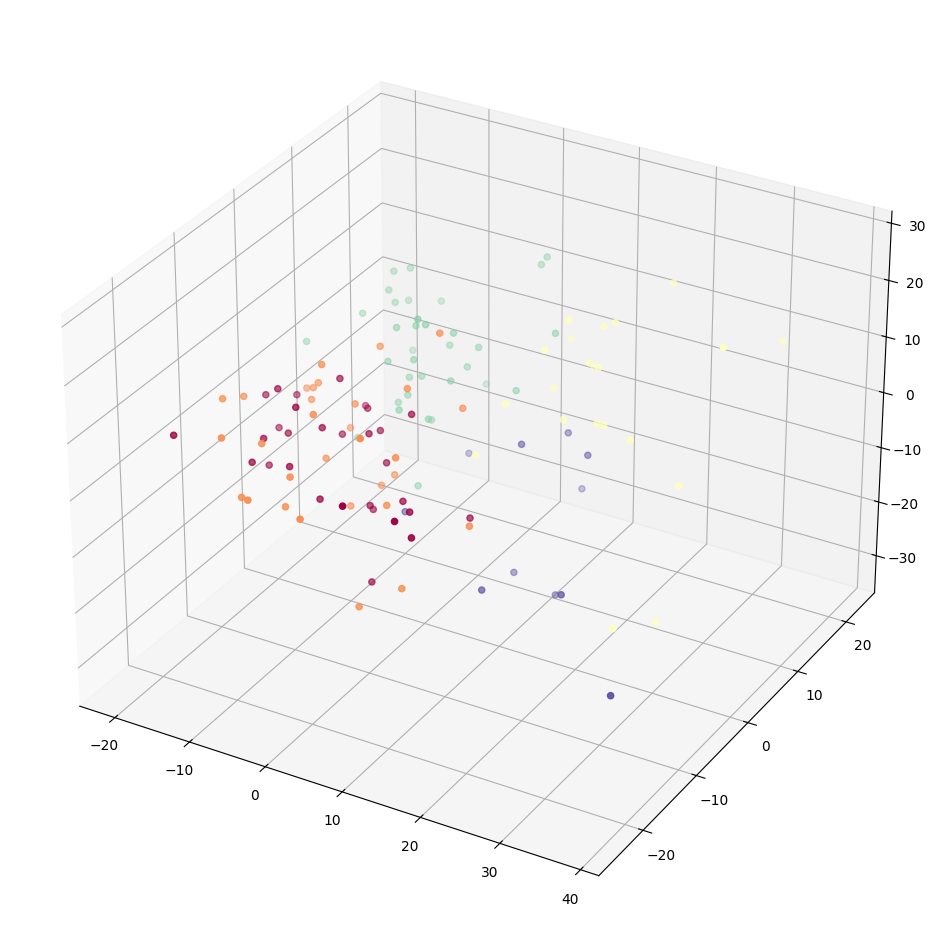

In [15]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

z = [k[i+2] for k in data["factor"]]

ax.scatter(x, y, z, c=data["cluster"], cmap = "Spectral")
plt.show()

In [50]:
reducer = umap.UMAP(
    n_components=3, n_neighbors=4, random_state=69, transform_seed=42, verbose=False
)

In [51]:
x = data["features"]

In [52]:
reducer.fit(x)

C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,n_neighbors,4
,n_components,3
,metric,'euclidean'
,metric_kwds,None
,output_metric,'euclidean'
,output_metric_kwds,None
,n_epochs,None
,learning_rate,1.0
,init,'spectral'
,min_dist,0.1
,spread,1.0


In [53]:
embedding = reducer.transform(x)
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(127, 3)

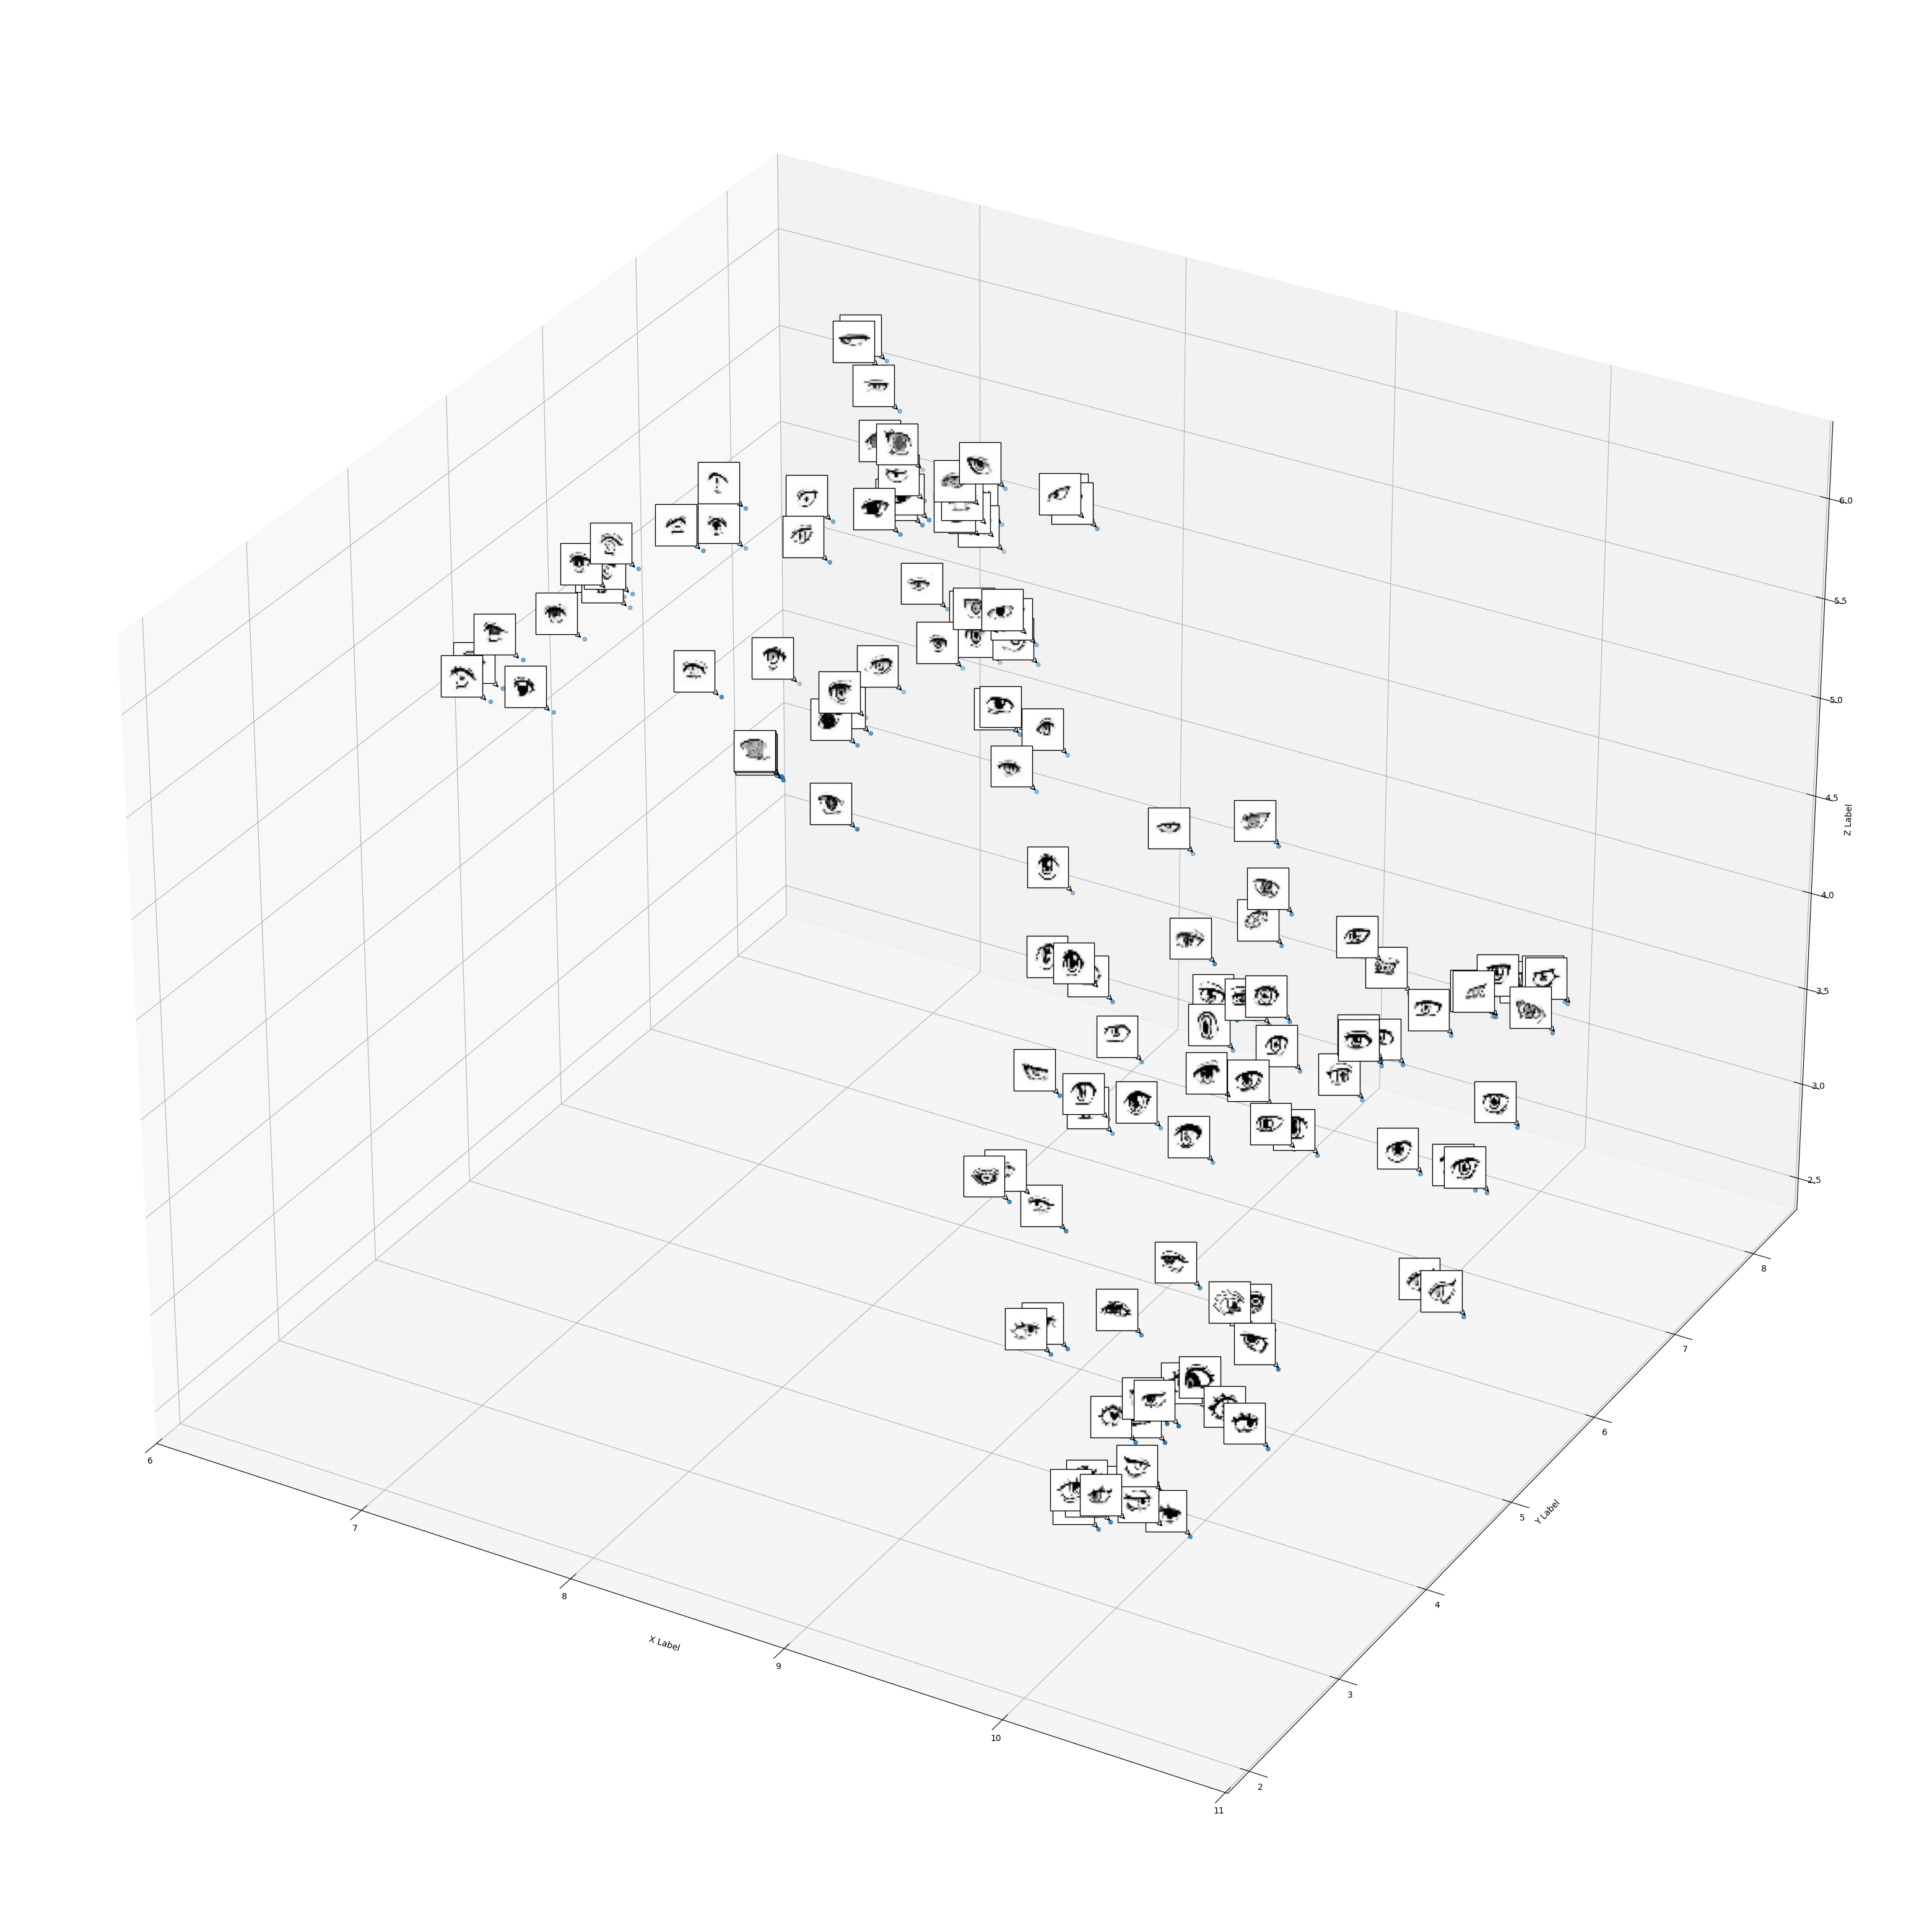

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np

xs = embedding[:, 0]
ys = embedding[:, 1]
zs = embedding[:, 2]

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection=Axes3D.name)

ax.scatter(xs, ys, zs, marker="o")

# Create a dummy axes to place annotations to
ax2 = fig.add_subplot(111,frame_on=False) 
ax2.axis("off")
ax2.axis([0,1,0,1])


def proj(X, ax1, ax2):
    """ From a 3D point in axes ax1, 
        calculate position in 2D in ax2 """
    x,y,z = X
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax1.get_proj())
    return ax2.transData.inverted().transform(ax1.transData.transform((x2, y2)))

def image(ax,arr,xy):
    """ Place an image (arr) as annotation at position xy """
    im = offsetbox.OffsetImage(arr, zoom=2)
    im.image.axes = ax
    ab = offsetbox.AnnotationBbox(im, xy, xybox=(-30., 30.),
                        xycoords='data', boxcoords="offset points",
                        pad=0.3, arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)


i=-1
for s in zip(xs,ys,zs):
    i=i+1
    x,y = proj(s, ax, ax2)
    image(ax2,cv2.resize(data["image"][i], (21,21)),[x,y])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

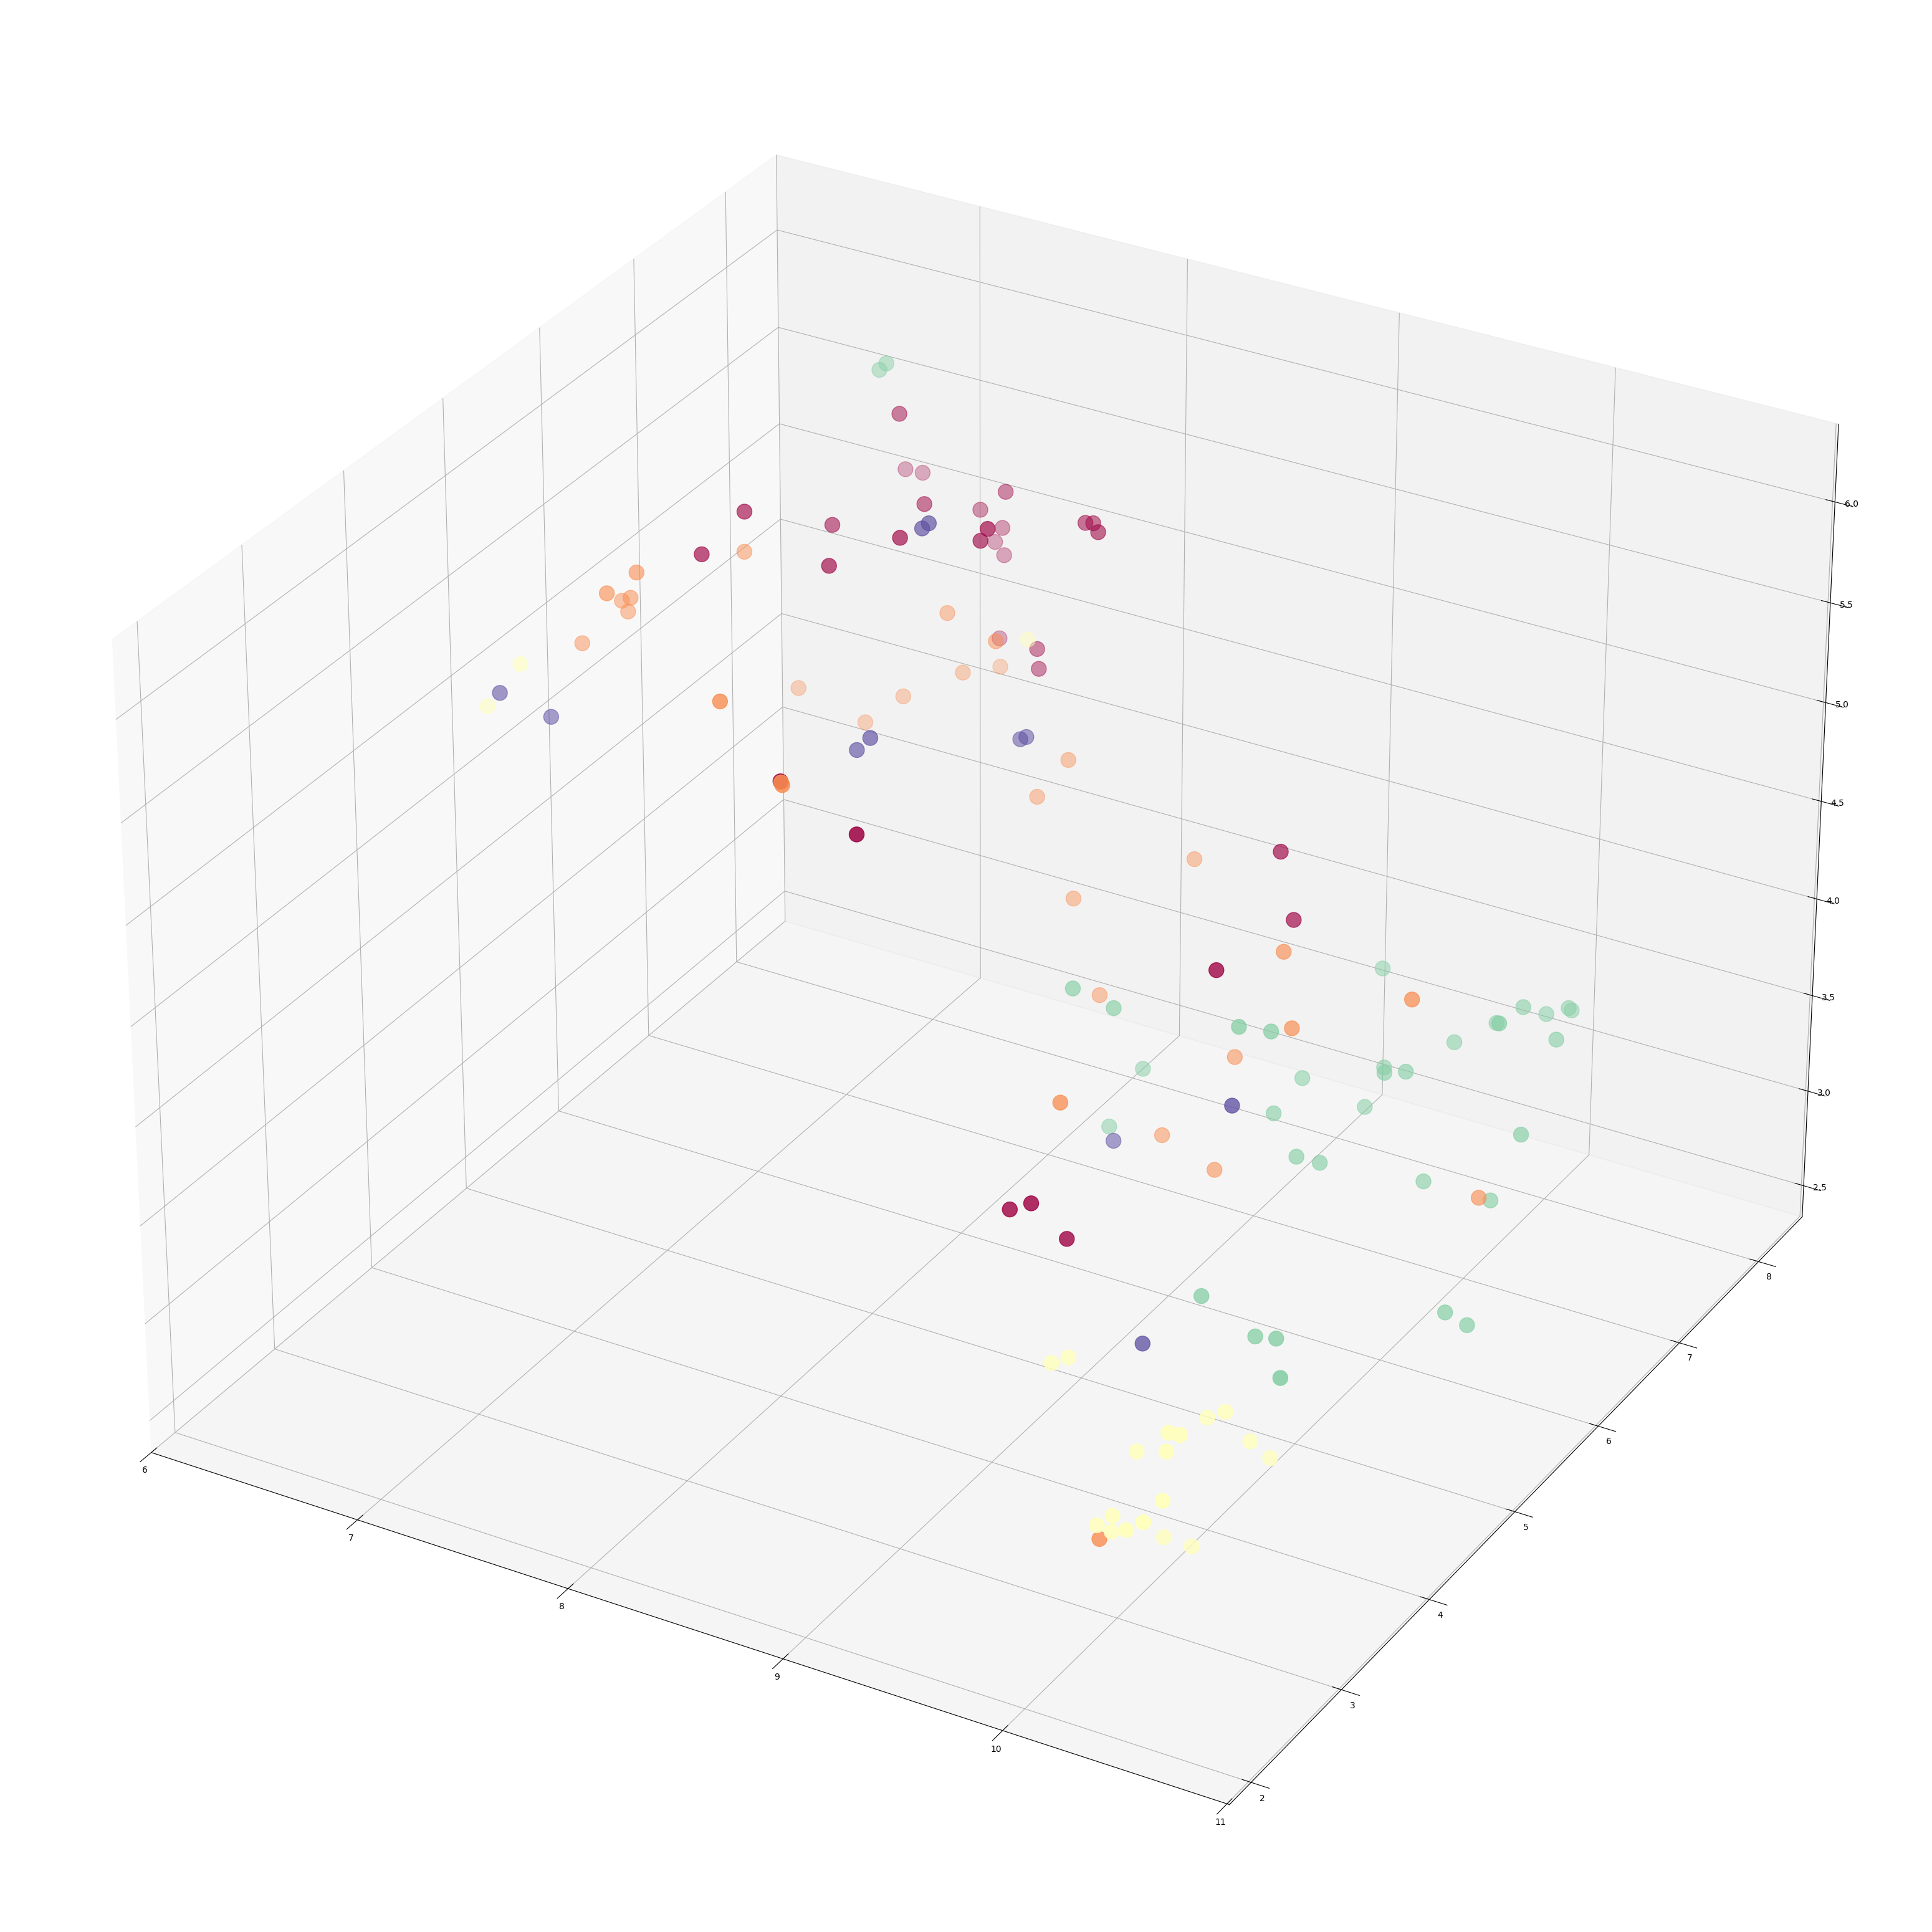

In [55]:
from matplotlib.offsetbox import AnnotationBbox

fig = plt.figure(figsize=(40, 40))
ax = fig.add_subplot(projection='3d')

ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c = data["cluster"], cmap="Spectral", s=300)

plt.show()

In [56]:
data["umap_reducer"] = embedding

In [59]:
data.keys()

dict_keys(['name', 'image', 'features', 'factor', 'cluster', 'umap_reducer'])

In [ ]:


z = [k[i+2] for k in data["factor"]]

ax.scatter(x, y, z, c=data["cluster"])
plt.show()

In [48]:
from sklearn.datasets import load_digits

digits = load_digits()

In [50]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data["image"][0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]